In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2586 - accuracy: 0.9250 - val_loss: 0.1334 - val_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1152 - accuracy: 0.9656 - val_loss: 0.1015 - val_accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0781 - accuracy: 0.9765 - val_loss: 0.0829 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0762 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0778 - val_accuracy: 0.9766


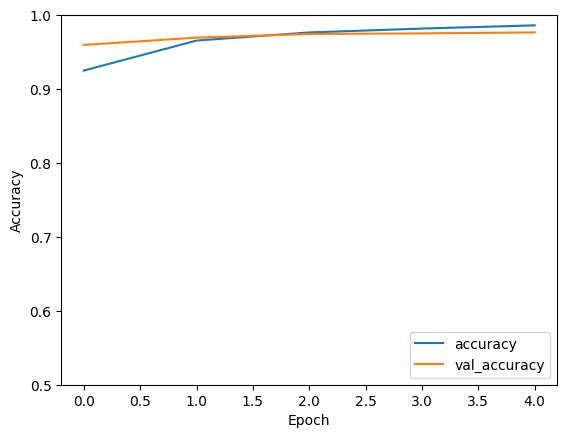

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


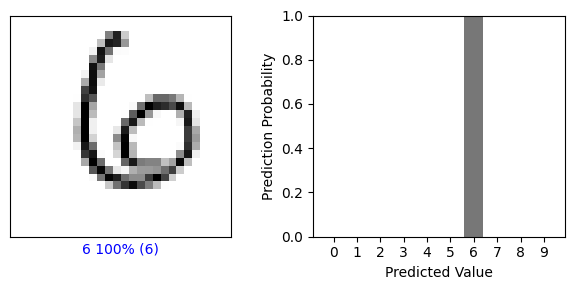

In [6]:
#결과 시각화 정리
import numpy as np

# 테스트 데이터를 사용하여 예측 수행
predictions = model.predict(x_test)

def display_prediction(index, predictions_array, true_label, img):
    plt.figure(figsize=(6,3))

    # 이미지 출력
    plt.subplot(1, 2, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index], cmap=plt.cm.binary)

    # 예측 결과 출력
    predicted_label = np.argmax(predictions_array[index])
    if predicted_label == true_label[index]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array[index]),
                                         true_label[index]),
                                         color=color)

    # 예측 확률 막대그래프 출력
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions_array[index], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10))
    plt.ylabel('Prediction Probability')
    plt.xlabel('Predicted Value')

    plt.tight_layout()
    plt.show()

# 첫 번째 예측 결과 시각화
display_prediction(100, predictions, y_test, x_test)

# 두 번째 예측 결과 시각화 (실제로 코드를 실행할 수 있다면 이 부분을 주석 해제하여 실행하세요)
# display_prediction(1, predictions, y_test, x_test)